# Predict Bike Sharing Demand with AutoGluon

## Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.3
    Uninstalling pip-22.0.3:
      Successfully uninstalled pip-22.0.3
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/4f/ab/0bcfebdfc3bfa8554b2b2c97a555569c4c1ebc74ea288741ea8326c51906/setuptools-68.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/28/f5/6955d7b3a5d71ce6bac104f9cf98c1b0513ad656cdaca8ea7d579196f771/wheel-0.41.1-py3-none-any.whl.metadata
  Using cached wheel-0.41.1-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 6.8 MB/s eta 0:00:00:00:01
Using cached wheel-0.41.1-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Uninstalling wheel-0.37.1:
      Successfully uninstalled wheel-0.37.1
  Attempting uninstall: setuptools
    Found existin

### Setup Kaggle API Key

In [38]:
!pip install -U pip setuptools 

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/4f/ab/0bcfebdfc3bfa8554b2b2c97a555569c4c1ebc74ea288741ea8326c51906/setuptools-68.1.2-py3-none-any.whl.metadata
  Using cached setuptools-68.1.2-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-68.1.2-py3-none-any.whl (805 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.19 requires setuptools~=60.2.0, but you have setuptools 68.1.2 which is incompatible.


In [39]:
!pip install kaggle==1.5.15

  Using cached kaggle-1.5.15.tar.gz (77 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached bleach-6.0.0-py3-none-any.whl (162 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for kaggle: filename=kaggle-1.5.15-py3-none-any.whl size=99601 sha256=71f844371e039afd44d19aeaaafd7a6db758acd690d4332173ff167e07716445
  Stored in directory: /root/.cache/pip/wheels/6d/41/19/71e3189da3afee54030f6aa5748f0830605f6538ba348c75b8
Successfully built kaggle


In [40]:
# create the .kaggle directory and an empty kaggle.json file
#!mkdir -p /root/.kaggle
#!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [41]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "maximshatskiy"
kaggle_key = "1acad3551b71bdd70069c2f5ef278dd3"

# Save API token the kaggle.json file
#with open("/root/.kaggle/kaggle.json", "w") as f:
#   f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [42]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [26]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Train a model using AutoGluon’s Tabular Prediction

In [14]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':5,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }

predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error", 
                             problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]),
                                                            hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_082426/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_082426/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2888.2 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stag

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

### Review AutoGluon's training run with ranking of models that did the best.

In [43]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -148.246536       0.053681  7.244298                0.002162           0.114170            2       True          3
1             CatBoost -149.017806       0.003064  3.801892                0.003064           3.801892            1       True          2
2             LightGBM -149.213280       0.048455  3.328237                0.048455           3.328237            1       True          1
Number of models trained: 3
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel', 'CatBoostModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])     : 3 | ['temp', 'atemp', 'windspeed']
('int', [])       : 3 | ['season', 'weather', 'humidity']
('int', ['bool']) : 2 | ['holiday', 'workin

{'model_types': {'LightGBM': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM': -149.21327983845134,
  'CatBoost': -149.01780610099757,
  'WeightedEnsemble_L2': -148.24653576159565},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM': 'AutogluonModels/ag-20230819_082426/models/LightGBM/',
  'CatBoost': 'AutogluonModels/ag-20230819_082426/models/CatBoost/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230819_082426/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'LightGBM': 3.3282365798950195,
  'CatBoost': 3.801891565322876,
  'WeightedEnsemble_L2': 0.11416983604431152},
 'model_pred_times': {'LightGBM': 0.04845547676086426,
  'CatBoost': 0.003064393997192383,
  'WeightedEnsemble_L2': 0.0021615028381347656},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5},
  '

### Create predictions from test dataset

In [44]:
predictions = predictor.predict(data=test)
predictions.head()

0    108.430756
1     63.537910
2     63.537910
3     86.345879
4     86.345879
Name: count, dtype: float32

In [45]:
predictions.describe()

count    6493.000000
mean      185.428406
std       107.994186
min        -0.780264
25%       100.257729
50%       158.366577
75%       257.624298
max       600.801880
Name: count, dtype: float64

In [46]:
sum(predictions<0)

1

In [47]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [48]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "cat depth 5"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 350kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission.csv                             2023-08-19 08:33:10  cat depth 5                                                              complete  1.30748      1.30748       
submission_new_hpo_medium_quality_hpo.csv  2023-08-11 13:24:32  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  0.72350      0.72350       
submission_hpo_best_quality.csv            2023-08-11 13:24:28  best_quality_hpo                                                         complete  0.55206      0.55206       
submission_hpo_high_quality.csv            2023-08-11 13:04:05  high_quality_hpo                                             

#### Initial score of `1.28544`

In [51]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':7,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }


predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error", 
                             problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]), 
                                                            hyperparameters=hyperparameters)
predictions = predictor.predict(data=test)
sum(predictions<0)
submission["count"] = predictions
submission.to_csv("submission_initial_high_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_initial_high_quality.csv -m "cat depth 7"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_083408/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_083408/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2787.25 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 408kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_initial_high_quality.csv        2023-08-19 08:34:14  cat depth 7                                                              complete  1.30195      1.30195       
submission.csv                             2023-08-19 08:33:10  cat depth 5                                                              complete  1.30748      1.30748       
submission_new_hpo_medium_quality_hpo.csv  2023-08-11 13:24:32  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  0.72350      0.72350       

In [55]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':14,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }


predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error", 
                             problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]), 
                                                            hyperparameters=hyperparameters)
predictions = predictor.predict(data=test)
sum(predictions<0)
submission["count"] = predictions
submission.to_csv("submission_initial_best_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_initial_best_quality.csv -m "cat depth 14"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 15

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_083802/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_083802/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2583.03 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 400kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_initial_best_quality.csv        2023-08-19 08:38:34  cat depth 14                                                             complete  1.31381      1.31381       
submission_initial_best_quality.csv        2023-08-19 08:37:17  cat depth 14                                                             complete  1.31381      1.31381       
submission_initial_best_quality.csv        2023-08-19 08:36:16  no features best_quality                                                 complete  1.30830      1.30830       

## Exploratory Data Analysis and Creating an additional feature

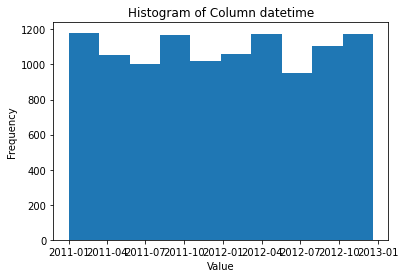

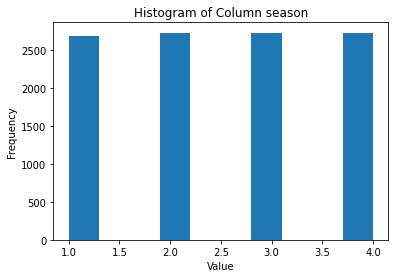

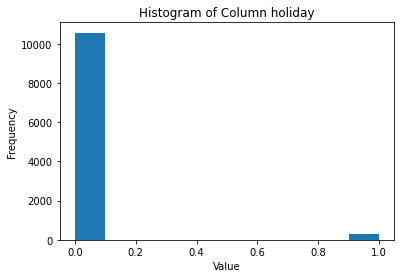

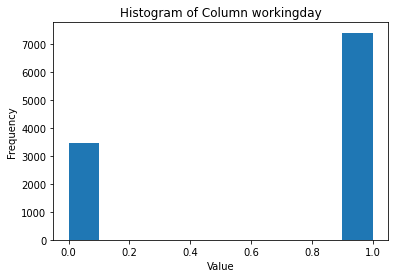

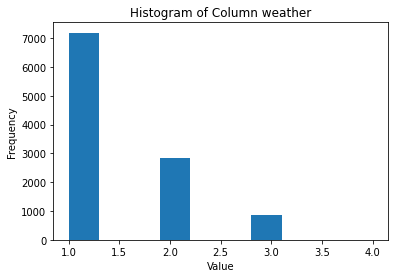

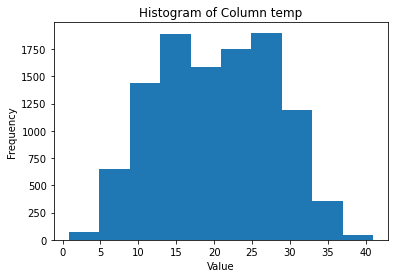

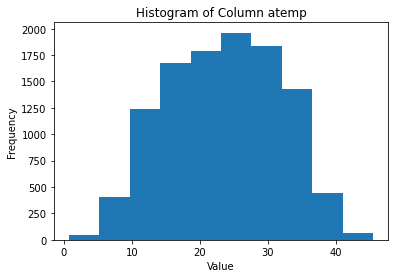

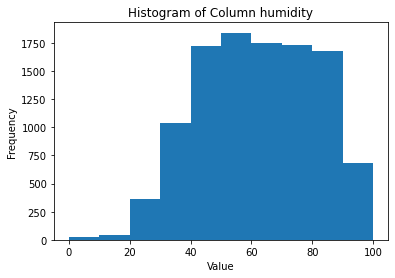

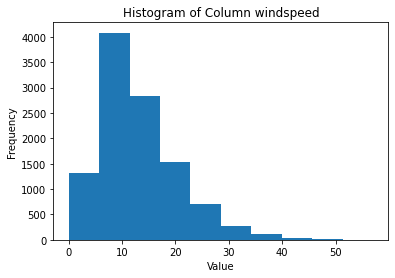

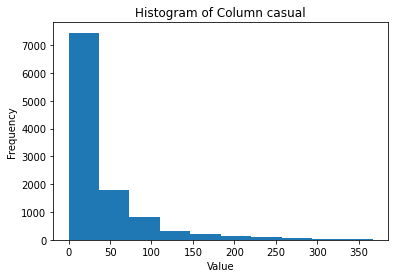

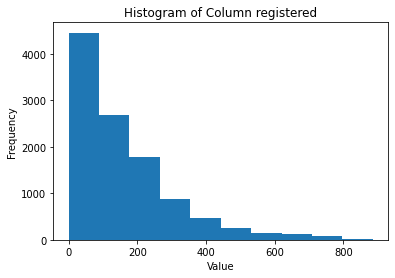

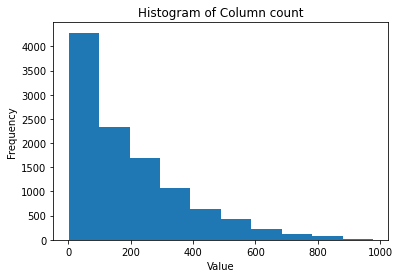

In [22]:
import matplotlib.pyplot as plt
for col in train.columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(train[col])
    plt.title(f'Histogram of Column {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [23]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day

train["month"] = train["datetime"].dt.month
test["month"] = test["datetime"].dt.month

## Make category types for these models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype(dtype="category")
train["weather"] = train["weather"].astype(dtype="category")

test["season"] = train["season"] = train["season"].astype(dtype="category")
test["weather"] = test["weather"].astype(dtype="category")

In [25]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  month       10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(9)
memory usage: 

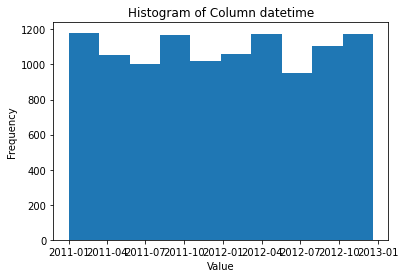

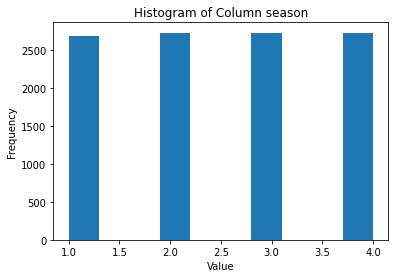

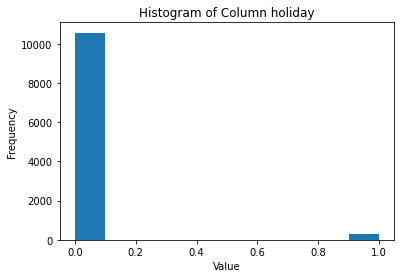

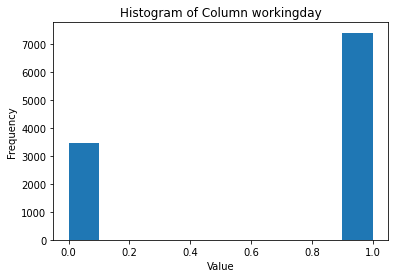

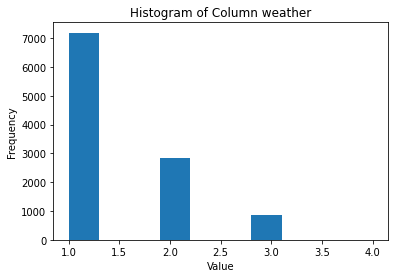

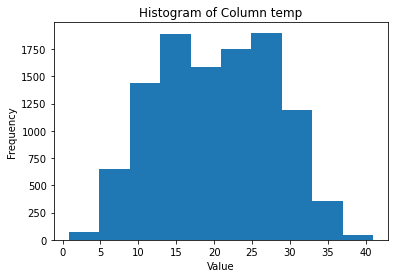

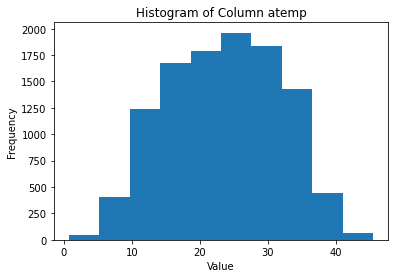

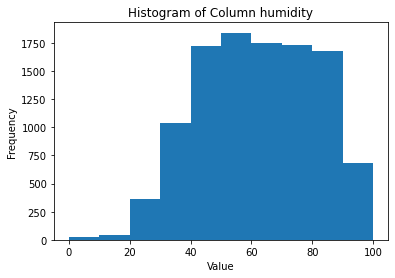

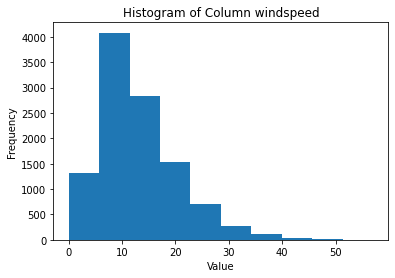

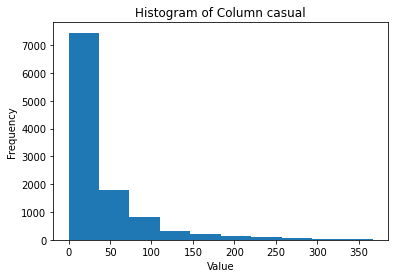

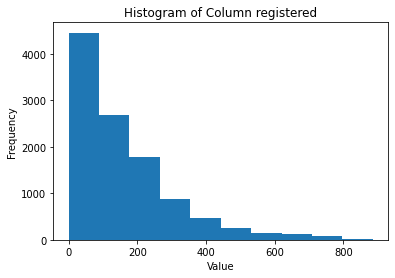

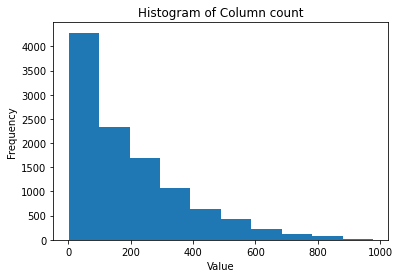

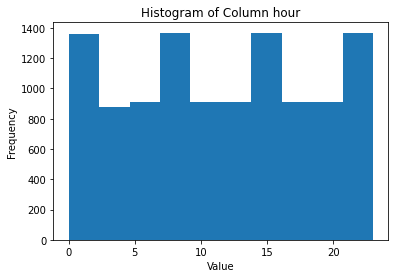

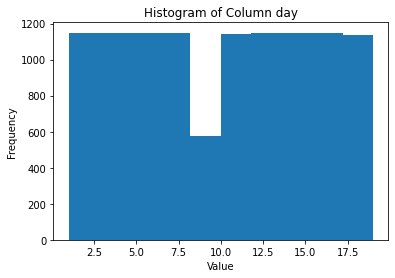

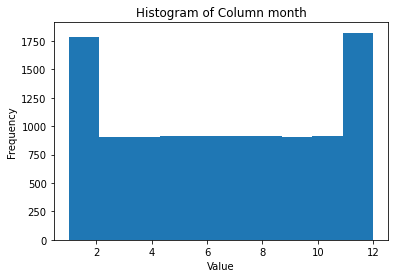

In [27]:
for col in train.columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(train[col])
    plt.title(f'Histogram of Column {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [59]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':5,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }

predictor_new_features = TabularPredictor(label="count",
                                          eval_metric="root_mean_squared_error", 
                                          problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]),
                                                                        hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_084310/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_084310/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2584.31 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

In [60]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -148.246536       0.026772  5.765190                0.000625           0.114878            2       True          3
1             CatBoost -149.017806       0.004167  4.109675                0.004167           4.109675            1       True          2
2             LightGBM -149.213280       0.021981  1.540637                0.021981           1.540637            1       True          1
Number of models trained: 3
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel', 'CatBoostModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])     : 3 | ['temp', 'atemp', 'windspeed']
('int', [])       : 3 | ['season', 'weather', 'humidity']
('int', ['bool']) : 2 | ['holiday', 'workin

{'model_types': {'LightGBM': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM': -149.21327983845134,
  'CatBoost': -149.01780610099757,
  'WeightedEnsemble_L2': -148.24653576159565},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM': 'AutogluonModels/ag-20230819_084310/models/LightGBM/',
  'CatBoost': 'AutogluonModels/ag-20230819_084310/models/CatBoost/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230819_084310/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'LightGBM': 1.5406365394592285,
  'CatBoost': 4.10967493057251,
  'WeightedEnsemble_L2': 0.11487841606140137},
 'model_pred_times': {'LightGBM': 0.02198052406311035,
  'CatBoost': 0.004166603088378906,
  'WeightedEnsemble_L2': 0.0006251335144042969},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5},
  'C

In [61]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(data=test)
predictions_new_features[predictions_new_features<0]=0

In [62]:
predictions_new_features.head()

0    108.430756
1     63.537910
2     63.537910
3     86.345879
4     86.345879
Name: count, dtype: float32

In [63]:
# Same submitting predictions
submission_new_features = submission
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "CAT feat 5"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 296kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv                2023-08-19 08:43:21  CAT feat 5                                                               complete  1.30748      1.30748       
submission_new_features.csv                2023-08-19 08:42:51  CAT feat 5                                                               complete  0.75600      0.75600       
submission_initial_best_quality.csv        2023-08-19 08:38:34  cat depth 14                                                             complete  1.31381      1.31381       
submission_initial_best_quality.csv        2023-08-19 08:37:17  cat depth 14                                                 

#### New Score of `0.75600`

In [66]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':7,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }

predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error", 
                             problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]), 
                                                            hyperparameters=hyperparameters)
predictions_new_features = predictor.predict(data=test)
sum(predictions_new_features<0)
submission["count"] = predictions_new_features
submission.to_csv("submission_features_high_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_features_high_quality.csv -m "with feat CAT 7"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_084351/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_084351/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2583.16 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 346kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_features_high_quality.csv       2023-08-19 08:43:56  with feat CAT 7                                                          complete  1.30195      1.30195       
submission_new_features.csv                2023-08-19 08:43:21  CAT feat 5                                                               complete  1.30748      1.30748       
submission_new_features.csv                2023-08-19 08:42:51  CAT feat 5                                                               complete  0.75600      0.75600       

In [67]:
hyperparameters ={'CAT': {'iterations': 10000,
   'learning_rate': 0.05,
   'random_seed': 0,
   'depth':14,
   'allow_writing_files': False,
   'eval_metric': 'RMSE'},

  'GBM': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5}
    }

predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error", 
                             problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]), 
                                                            hyperparameters=hyperparameters)
predictions_new_features = predictor.predict(data=test)
sum(predictions_new_features<0)
submission["count"] = predictions_new_features
submission.to_csv("submission_features_best_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_features_best_quality.csv -m "with feat CAT 14"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_084358/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230819_084358/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.82 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2583.17 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Sta

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 276kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_features_best_quality.csv       2023-08-19 08:44:31  with feat CAT 14                                                         complete  1.31381      1.31381       
submission_features_high_quality.csv       2023-08-19 08:43:56  with feat CAT 7                                                          complete  1.30195      1.30195       
submission_new_features.csv                2023-08-19 08:43:21  CAT feat 5                                                               complete  1.30748      1.30748       

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [68]:
import autogluon.core as ag


gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

cat_options = {
    'iterations': ag.space.Int(lower=100, upper=500, default=100),  # Specify a fixed number of iterations
    'learning_rate': ag.space.Real(0.005, 0.1),  # Range of learning rate to search
    'depth': ag.space.Int(4, 15),  # Range of tree depths to search
    'bagging_temperature': ag.space.Real(0, 1.0),  # Range of bagging temperature values to search
    # Add other hyperparameters here
}

xgb_options = {
    'n_estimators': ag.space.Int(lower=50, upper=200),  # Number of boosting rounds
    'learning_rate': ag.space.Real(lower=0.01, upper=0.1),  # Learning rate (eta)
    'max_depth': ag.space.Int(lower=4, upper=10),  # Maximum depth of each tree
    'subsample': ag.space.Real(lower=0.5, upper=1.0),  # Fraction of samples used for fitting each tree
    'colsample_bytree': ag.space.Real(lower=0.5, upper=1.0),  # Fraction of features used for fitting each tree
}



hyperparameters = {'GBM': gbm_options,
                   'CAT': cat_options,
                   'XGB': xgb_options, 
                  }

time_limit = 20*60  # train various models for ~2 min
num_trials = 50  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [69]:
!pip install opencv-python==4.5.5.64

  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62


In [70]:
predictor_new_hpo = TabularPredictor(label="count",
                                     eval_metric="root_mean_squared_error", 
                                     problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]),
                                                                                                                         time_limit=time_limit, 
                                                                                                                         hyperparameters=hyperparameters, 
                                                                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                                                         refit_full='best', presets="medium_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_084614/"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230819_084614/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.80 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2597.19 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to

In [71]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2 -143.867162       0.041336  18.434985                0.000492           0.794492            2       True        151
1                CatBoost/T23 -143.989512       0.004946  16.327329                0.004946          16.327329            1       True         73
2                CatBoost/T13 -144.512107       0.004050  19.067474                0.004050          19.067474            1       True         63
3                CatBoost/T48 -144.570204       0.008924  45.063879                0.008924          45.063879            1       True         98
4                CatBoost/T34 -144.581774       0.002797   6.928210                0.002797           6.928210            1       True         84
5                CatBoost/T25 -144.592950       0.002342  21.5

{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'LightGBM/T21': 'LGBModel',
  'LightGBM/T22': 'LGBModel',
  'LightGBM/T23': 'LGBModel',
  'LightGBM/T24': 'LGBModel',
  'LightGBM/T25': 'LGBModel',
  'LightGBM/T26': 'LGBModel',
  'LightGBM/T27': 'LGBModel',
  'LightGBM/T28': 'LGBModel',
  'LightGBM/T29': 'LGBModel',
  'LightGBM/T30': 'LGBModel',
  'LightGBM/T31': 'LGBModel',
  'LightGBM/T32': 'LGBModel',
  'LightGBM/T33': 'LGBModel',
  'L

In [72]:
# Remember to set all negative values to zero
predictor_new_hpo = predictor_new_hpo.predict(data=test)
predictor_new_hpo[predictor_new_hpo<0]=0

In [73]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictor_new_hpo
submission_new_hpo.to_csv("submission_new_hpo_medium_quality_hpo.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_medium_quality_hpo.csv -m "hyperparameters submission_new_hpo_medium_quality_hpo"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 333kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,114.928047
1,2011-01-20 01:00:00,52.471336
2,2011-01-20 02:00:00,52.471336
3,2011-01-20 03:00:00,84.600189
4,2011-01-20 04:00:00,84.600189


In [76]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_medium_quality_hpo.csv  2023-08-19 08:51:25  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  1.30936      1.30936       
submission_features_best_quality.csv       2023-08-19 08:44:31  with feat CAT 14                                                         complete  1.31381      1.31381       
submission_features_high_quality.csv       2023-08-19 08:43:56  with feat CAT 7                                                          complete  1.30195      1.30195       
submission_new_features.csv                2023-08-19 08:43:21  CAT feat 5                                                   

#### New Score of `0.55207`

In [77]:
predictor_new_hpo = TabularPredictor(label="count",
                                     eval_metric="root_mean_squared_error", 
                                     problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]),
                                                                                                                         time_limit=time_limit, 
                                                                                                                         hyperparameters=hyperparameters, 
                                                                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                                                         refit_full='best',
                                                                                                                         presets="high_quality")
predictions = predictor_new_hpo.predict(data=test)
sum(predictions<0)
submission["count"] = predictions
submission.to_csv("submission_hpo_high_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_hpo_high_quality.csv -m "high_quality_hpo"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_085127/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230819_085127/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.80 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2167.83 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 397kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_hpo_high_quality.csv            2023-08-19 09:10:42  high_quality_hpo                                                         complete  1.31065      1.31065       
submission_new_hpo_medium_quality_hpo.csv  2023-08-19 08:51:25  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  1.30936      1.30936       
submission_features_best_quality.csv       2023-08-19 08:44:31  with feat CAT 14                                                         complete  1.31381      1.31381       

In [78]:
predictor_new_hpo = TabularPredictor(label="count",
                                     eval_metric="root_mean_squared_error", 
                                     problem_type="regression").fit(train_data=train.drop(columns=["casual","registered","datetime"]),
                                                                                                                         time_limit=time_limit, 
                                                                                                                         hyperparameters=hyperparameters, 
                                                                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                                                         refit_full='best',
                                                                                                                         presets="best_quality")
predictions = predictor_new_hpo.predict(data=test)
sum(predictions<0)
submission["count"] = predictions
submission.to_csv("submission_hpo_best_quality.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_hpo_best_quality.csv -m "best_quality_hpo"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 20

No path specified. Models will be saved in: "AutogluonModels/ag-20230819_091044/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230819_091044/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372013.80 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1910.06 MB
	Train Data (Original)  Memory Usage: 0.7 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 372kB/s]
Successfully submitted to Bike Sharing DemandfileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_hpo_best_quality.csv            2023-08-19 09:30:16  best_quality_hpo                                                         complete  1.30805      1.30805       
submission_hpo_high_quality.csv            2023-08-19 09:10:42  high_quality_hpo                                                         complete  1.31065      1.31065       
submission_new_hpo_medium_quality_hpo.csv  2023-08-19 08:51:25  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  1.30936      1.30936       

## Report

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 20

fileName                                   date                 description                                                              status    publicScore  privateScore  
-----------------------------------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission_hpo_best_quality.csv            2023-08-19 09:30:16  best_quality_hpo                                                         complete  1.30805      1.30805       
submission_hpo_high_quality.csv            2023-08-19 09:10:42  high_quality_hpo                                                         complete  1.31065      1.31065       
submission_new_hpo_medium_quality_hpo.csv  2023-08-19 08:51:25  hyperparameters submission_new_hpo_medium_quality_hpo                    complete  1.30936      1.30936       
submission_features_best_quality.csv       2023-08-19 08:44:31  with feat CAT 14                                             

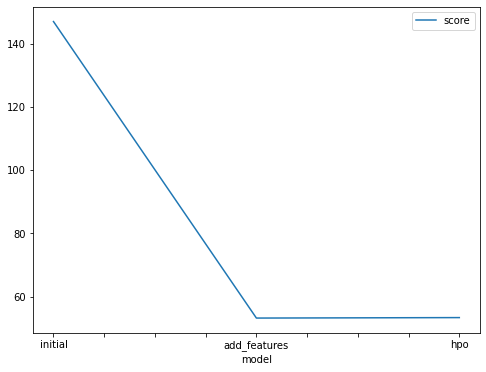

In [49]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [146.945, 53.187, 53.336]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

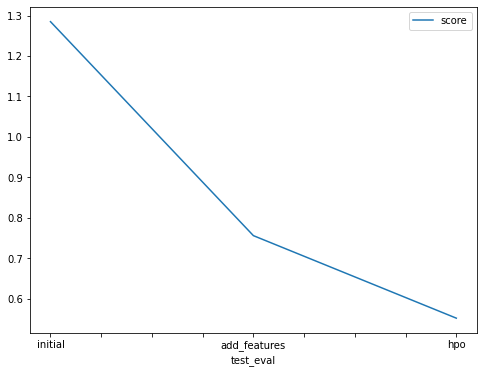

In [50]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.285, 0.756, 0.552]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
pd.DataFrame({
    "model": ["initial"],
    "CAT depth": [5, 7, 14],
    "score": [1.30748 , 1.30195, 1.31381]
})